In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr

In [78]:
TMFsim = pd.read_csv("./data/TMFSIM.csv")
UPROsim = pd.read_csv("./data/UPROSIM.csv")

UPROsim["UPRO"] = UPROsim["UPRO"].str.replace("%", "").astype("float")
TMFsim["TMF"] = TMFsim["TMF"].str.replace("%", "").astype("float")

UPROsim

,Date,UPRO_sim,Unnamed: 2
0,5/20/86,3.7,NaN
1,5/21/86,-0.7,NaN
2,5/22/86,5.9,NaN
3,5/23/86,1.4,NaN
4,5/27/86,4.2,NaN
...,...,...,...
8252,2/14/19,-0.7,NaN
8253,2/15/19,3.3,NaN
8254,2/19/19,0.4,NaN
8255,2/20/19,0.6,NaN


In [69]:
TMFsim['Date'] = pd.to_datetime(TMFsim['Date'], format='%m/%d/%y')
UPROsim['Date'] = pd.to_datetime(UPROsim['Date'], format='%m/%d/%y')
UPROsim.rename(columns={'UPRO': 'UPRO_sim'}, inplace=True)
TMFsim.rename(columns={'TMF': 'TMF_sim'}, inplace=True)

display(TMFsim.iloc[:, :-1].head())
display(UPROsim.iloc[:, :-1].head())


,Date,TMF_sim
0,1986-05-20,-0.6
1,1986-05-21,3.0
2,1986-05-22,-0.6
3,1986-05-23,0.6
4,1986-05-27,1.3


,Date,UPRO_sim
0,1986-05-20,3.7
1,1986-05-21,-0.7
2,1986-05-22,5.9
3,1986-05-23,1.4
4,1986-05-27,4.2


In [85]:
spy = yf.Ticker("SPY")
spy.info

{'longBusinessSummary': 'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 508.08,
 'open': 508.98,
 'dayLow': 508.56,
 'dayHigh': 513.29,
 'regularMarketPreviousClose': 508.08,
 'regularMarketOpen': 508.98,
 'regularMarketDayLow': 508.56,
 'regularMarketDayHigh': 513.29,
 'trailingPE': 25.83455,
 'volume': 76610613,
 'regularMarketVolume': 76610613,
 'averageVolume': 77457578,
 'averageVolume10days': 66100450,
 'averageDailyVolume10Day': 66100450,
 'bid': 512.01,
 'ask': 512.14,
 'bidSize': 1000,
 'askSize': 1400,
 'yield': 0.0137,
 'totalAssets': 483743596544,
 'fiftyTwoWeekLow': 380.65,
 'fiftyTwoWeekHigh': 513.29,
 'fiftyDayAverage': 487.2184,
 'twoHundredDayAverage': 451.6969,
 'trailingAnnualDividendRate': 5.662,
 't

In [74]:
HFEA = yf.Tickers("spy tlt")
spy = HFEA.tickers["SPY"]
tlt = HFEA.tickers["TLT"]

In [81]:
yf.pdr_override()
real_data = yf.download("SPY TLT")

[*********************100%%**********************]  2 of 2 completed


In [90]:
real_data

Price        Adj Close                  Close                   High  \
Ticker             SPY        TLT         SPY        TLT         SPY   
Date                                                                   
1993-01-29   24.840683        NaN   43.937500        NaN   43.968750   
1993-02-01   25.017353        NaN   44.250000        NaN   44.250000   
1993-02-02   25.070358        NaN   44.343750        NaN   44.375000   
1993-02-03   25.335375        NaN   44.812500        NaN   44.843750   
1993-02-04   25.441381        NaN   45.000000        NaN   45.093750   
...                ...        ...         ...        ...         ...   
2024-02-26  505.989990  93.296844  505.989990  93.589996  508.750000   
2024-02-27  506.929993  92.638916  506.929993  92.930000  507.160004   
2024-02-28  506.260010  93.227066  506.260010  93.519997  506.859985   
2024-02-29  508.079987  93.885002  508.079987  94.180000  509.739990   
2024-03-01  512.849976  94.470001  512.849976  94.470001  513.289978   

Price                         Low                   Open               Volume  \
Ticker            TLT         SPY        TLT         SPY        TLT       SPY   
Date                                                                            
1993-01-29        NaN   43.750000        NaN   43.968750        NaN   1003200   
1993-02-01        NaN   43.968750        NaN   43.968750        NaN    480500   
1993-02-02        NaN   44.125000        NaN   44.218750        NaN    201300   
1993-02-03        NaN   44.375000        NaN   44.406250        NaN    529400   
1993-02-04        NaN   44.468750        NaN   44.968750        NaN    531500   
...               ...         ...        ...         ...        ...       ...   
2024-02-26  94.029999  505.859985  93.190002  508.299988  94.000000  50386700   
2024-02-27  93.470001  504.750000  92.849998  506.700012  93.239998  48854500   
2024-02-28  93.599998  504.959991  92.900002  505.329987  93.080002  56506600   
2024-02-29  94.300003  505.350006  93.779999  508.070007  93.820000  83924800   
2024-03-01  94.510002  508.559998  93.010002  508.980011  93.440002  76805900   

Price                   
Ticker             TLT  
Date                    
1993-01-29         NaN  
1993-02-01         NaN  
1993-02-02         NaN  
1993-02-03         NaN  
1993-02-04         NaN  
...                ...  
2024-02-26  27855000.0  
2024-02-27  30242000.0  
2024-02-28  34574200.0  
2024-02-29  51038600.0  
2024-03-01  45822800.0  

[7828 rows x 12 columns]

In [92]:
real_data.columns

MultiIndex([('Adj Close', 'SPY'),
            ('Adj Close', 'TLT'),
            (    'Close', 'SPY'),
            (    'Close', 'TLT'),
            (     'High', 'SPY'),
            (     'High', 'TLT'),
            (      'Low', 'SPY'),
            (      'Low', 'TLT'),
            (     'Open', 'SPY'),
            (     'Open', 'TLT'),
            (   'Volume', 'SPY'),
            (   'Volume', 'TLT')],
           names=['Price', 'Ticker'])

In [93]:
def leverage(df, tickers, lev = 1):
    pct_change_list = []

    for index, letf in tickers.items():
        if ('Close', index) in df.columns:
            # Calculate percentage change for the specified ticker's 'Close' price
            pct_change_series = df['Close', index].pct_change() * 100 * lev  # Multiply by 100 to convert to percentage
            pct_change_series.name = f"{letf}_ours"  # Rename the Series for clarity
            pct_change_list.append(pct_change_series)

    # Concatenate all the percentage change Series into a single DataFrame
    if pct_change_list:
        pct_change_df = pd.concat(pct_change_list, axis=1)
        pct_change_df.index.name = 'Date'  # Assuming the DataFrame's index is Date
        # Reset index to turn the Date index into a column
        pct_change_df.reset_index(inplace=True)
        return pct_change_df
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no tickers were found or provided

In [95]:
tickers = {'SPY': 'UPRO', 'TLT': 'TMF'}
pct_change_df = leverage(real_data, tickers , 3)
pct_change_df = leverage(real_data, tickers, 3)
pct_change_df['Date'] = pd.to_datetime(pct_change_df['Date'])
print(pct_change_df)

           Date  UPRO_ours  TMF_ours
0    1993-01-29        NaN       NaN
1    1993-02-01   2.133713       NaN
2    1993-02-02   0.635593       NaN
3    1993-02-03   3.171247       NaN
4    1993-02-04   1.255230       NaN
...         ...        ...       ...
7823 2024-02-26  -1.098759 -0.894875
7824 2024-02-27   0.557325 -2.115598
7825 2024-02-28  -0.396494  1.904648
7826 2024-02-29   1.078483  2.117206
7827 2024-03-01   2.816479  0.923766

[7828 rows x 3 columns]


In [95]:
joined_df = pd.merge(pct_change_df, TMFsim.iloc[:, :-1], on='Date', how='outer')
joined_df = pd.merge(joined_df, UPROsim.iloc[:, :-1], on='Date', how='outer')
joined_df.set_index(joined_df.columns[0], inplace=True)

joined_df.sort_values(by='Date', inplace=True)
joined_df[5500:6000]

,UPRO_ours,TMF_ours,TMF_sim,UPRO_sim
Date,,,,
2008-03-11,10.781264,-2.564362,-3.6,11.1
2008-03-12,-2.805442,5.787264,4.9,-2.7
2008-03-13,0.662287,-2.347237,-2.3,1.5
2008-03-14,-4.648675,3.708452,3.3,-6.3
2008-03-17,-3.032168,2.305274,1.0,-2.7
...,...,...,...,...
2010-02-26,0.189752,1.546057,1.8,0.4
2010-03-01,3.115410,-1.079967,0.3,3.0
2010-03-02,0.831167,-0.394116,-0.3,0.7


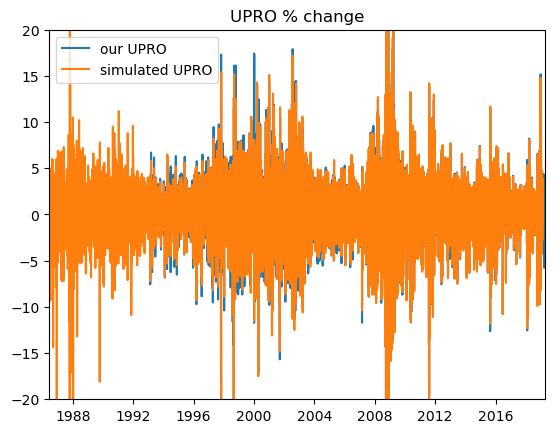

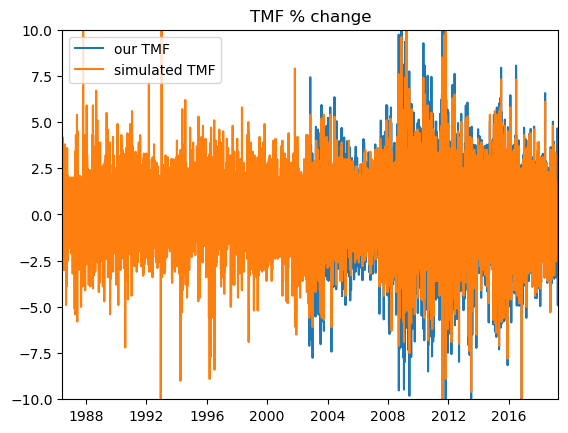

In [102]:
plt.plot(joined_df["UPRO_ours"], label="our UPRO")
plt.plot(joined_df["UPRO_sim"], label = "simulated UPRO")
plt.legend()
plt.title("UPRO % change")
plt.ylim(-20,20)
plt.xlim(6000,18000)
plt.show()

plt.plot(joined_df["TMF_ours"], label="our TMF")
plt.plot(joined_df["TMF_sim"], label = "simulated TMF")
plt.legend()
plt.title("TMF % change")
plt.xlim(6000,18000)
plt.ylim(-10,10)
plt.show()

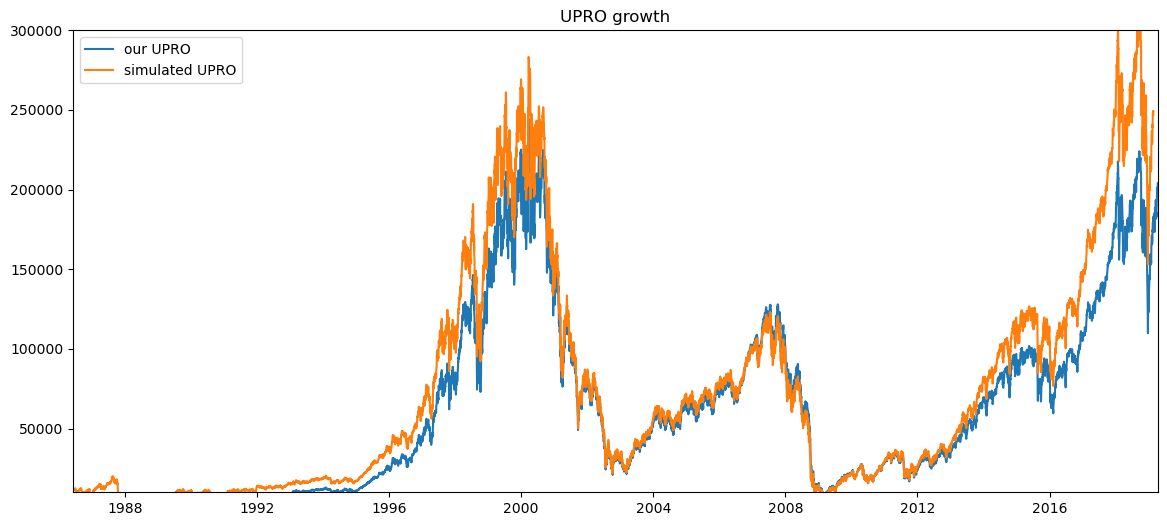

In [107]:
INIT = 10000

def growth(joined_df, init = 10000):
    # Set the first column as the index
    coeffs = 1 + joined_df / 100
    return INIT * coeffs.cumprod()

plt.figure(figsize=(14, 6))  # Adjust the width as needed
plt.plot(growth(joined_df, INIT)["UPRO_ours"], label="our UPRO")
plt.plot(growth(joined_df, INIT)["UPRO_sim"], label = "simulated UPRO")
plt.title("UPRO growth")
plt.legend()
plt.ylim(INIT,300000)
plt.xlim(6000,18000)
plt.show()

# TODO: starting year